# Basics for the financial data analysis

(Almost all codes are quoted to signate J-Quants competition tutorial https://japanexchangegroup.github.io/J-Quants-Tutorial/#_%E8%B2%A1%E5%8B%99%E8%AB%B8%E8%A1%A8%E3%81%A7%E6%A0%AA%E4%BE%A1%E3%81%AE%E5%85%88%E8%A1%8C%E3%81%8D%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%97%E3%82%88%E3%81%86)

**Signate** (Japanese competition platform for Data Scientists) opened a financial competition from 29th Jan. 2021 through the end of June 2021. The competition called : **Fundamentals Analysis Challenge supported by Japan Exchange Group** (https://signate.jp/competitions/423).  
It attracted large atthention as a first massive educational competition to improve financial literacy for the individual investors in Japan.  Among all, the quality of the official tutorial calls a certain level of reputation, and many potential investors or novice of data scientists have got to know the competion after it is finished.

Contrast to Kaggle platform, Signate suspends the distribution of datasets as soon as the competition closes. Also late submission system doesn't work after the period. It's regulation forces all participants to delete the distributed data as well. Therefore there is no legal way to follow up the reputational tutorials due to lack of data. 

This repository via GitPod provides a sample data from a 3rd party, Quandl(https://www.quandl.com/tools/api) - a NASDAQ platform -,  in order to self-educate the financial data basics with the competition notebook code.

Last but not least, Signate has annonced the intention to publish "signate quest" for this competition around the August 2021. We highly recommend to check and follow the official site : https://quest.signate.jp/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.4 Data loading

In [2]:
inputs = {
    "stock_price": f"./quandl_data/stock_price.csv",
    "stock_fin": f"./quandl_data/stock_fin.csv",
}

dfs = {}
for k, v in inputs.items():
        print(k)
        dfs[k] = pd.read_csv(v)
        if k == "stock_price":
            dfs[k].loc[:, "datetime"] = pd.to_datetime(
                dfs[k].loc[:, "Date"]
            )
            dfs[k].set_index("datetime", inplace=True)
        elif k in ["stock_fin", "stock_fin_price", "stock_labels"]:
            dfs[k].loc[:, "datetime"] = pd.to_datetime(
                dfs[k].loc[:, "date"]
            )
            dfs[k].set_index("datetime", inplace=True)

stock_price
stock_fin


In [3]:
for k in inputs.keys():
    print(k)
    print(dfs[k].info())
    print(dfs[k].head(1).T)

stock_price
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8048 entries, 2007-01-04 to 2017-11-21
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8048 non-null   object 
 1   Open    8048 non-null   float64
 2   High    8048 non-null   float64
 3   Low     8048 non-null   float64
 4   Close   8048 non-null   float64
 5   Volume  8047 non-null   float64
 6   ticker  8048 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 503.0+ KB
None
datetime  2007-01-04
Date      2007-01-04
Open          8110.0
High          8140.0
Low           8060.0
Close         8090.0
Volume     6986200.0
ticker          7203
stock_fin
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14228 entries, 2020-03-31 to 2014-03-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   None                    14228 non-null  int64  

## 2.5 EDA
### 2.

JCF data from quandl (free sample for Nintendo) contains P/L, BS, OCI, EQ, CF, Summary as fundamentals.  
```
$ fin_data['label_type'].unique()
array(['pl', 'bs', 'oci', 'eq', 'summary', 'cf'], dtype=object)
```

In precide, it contains the following information :
```
$ fin_data['label'].unique()
array(['WriteDownsOfInventories', 'WorkInProcess',
       'ValuationDifferenceOnAvailableForSaleSecuritiesNetOfTaxOCI',
       'ValuationDifferenceOnAvailableForSaleSecurities',
       'ValuationAndTranslationAdjustments', 'TreasuryStock',
       'TotalSaleAmountForDecreasedSharesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalSaleAmountForDecreasedSharesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalNumberOfSharesHeldTreasurySharesEtc',
       'TotalChangesOfItemsDuringThePeriod',
       'TotalAssetsSummaryOfBusinessResults',
       'TotalAcquisitionCostForIncreasedSharesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'TotalAcquisitionCostForIncreasedSharesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'ToolsFurnitureAndFixturesNet', 'SubtotalOpeCF', 'Software',
       'ShortTermInvestmentSecurities',
       'ShareOfOtherComprehensiveIncomeOfAssociatesAccountedForUsingEquityMethodOCI',
       'ShareholdingRatioTreasurySharesEtc', 'ShareholdingRatio',
       'ShareholdersEquity', 'SellingGeneralAndAdministrativeExpenses',
       'SalesDiscountsNOE', 'SalariesAllowancesAndBonusesSGA',
       'RetirementOfTreasuryStock', 'RetirementBenefitExpensesSGA',
       'RetainedEarnings', 'RestructuringLossEL', 'RestatedBalance',
       'ResearchAndDevelopmentExpensesSGA',
       'ResearchAndDevelopmentExpensesResearchAndDevelopmentActivities',
       'ResearchAndDevelopmentExpensesIncludedInGeneralAndAdministrativeExpensesAndManufacturingCostForCurrentPeriod',
       'RawMaterialsAndSupplies',
       'RateOfReturnOnEquitySummaryOfBusinessResults',
       'PurchaseOfTreasuryStockFinCF', 'PurchaseOfTreasuryStock',
       'PurchaseOfShortTermAndLongTermInvestmentSecuritiesInvCF',
       'PurchaseOfSharesOfConsolidatedSubsidiaries',
       'PurchaseOfPropertyPlantAndEquipmentAndIntangibleAssetsInvCF',
       'ProvisionOfAllowanceForDoubtfulAccountsSGA',
       'ProvisionForBonusesSGA', 'ProvisionForBonuses', 'ProvisionCL',
       'PropertyPlantAndEquipment',
       'ProfitLossAttributableToOwnersOfParentSummaryOfBusinessResults',
       'ProfitLossAttributableToOwnersOfParent',
       'ProfitLossAttributableToNonControllingInterests', 'ProfitLoss',
       'ProceedsFromWithdrawalOfTimeDepositsInvCF',
       'ProceedsFromSalesOfTreasuryStockFinCF',
       'ProceedsFromSalesOfPropertyPlantAndEquipmentAndIntangibleAssetsInvCF',
       'ProceedsFromSalesAndRedemptionOfShortTermAndLongTermInvestmentSecuritiesInvCF',
       'ProceedsFromPurchaseOfInvestmentsInSubsidiariesResultingInChangeInScopeOfConsolidationInvCF',
       'PriceEarningsRatioSummaryOfBusinessResults',
       'PaymentsIntoTimeDepositsInvCF', 'OtherNOI', 'OtherNOE',
       'OtherNetOpeCF', 'OtherNetInvCF', 'OtherNetFinCF', 'OtherNCL',
       'OtherIOA', 'OtherIA', 'OtherComprehensiveIncome', 'OtherCL',
       'OtherCA', 'OrdinaryIncomeLossSummaryOfBusinessResults',
       'OrdinaryIncome', 'OperatingIncome',
       'NumberOfVotingRightsIssuedSharesVotingRights',
       'NumberOfSharesIssuedSharesVotingRights',
       'NumberOfSharesHeldInOwnNameTreasurySharesEtc',
       'NumberOfSharesHeldInOthersNamesTreasurySharesEtc',
       'NumberOfSharesHeld',
       'NumberOfIssuesWhoseNumberOfSharesIncreasedSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesIncreasedSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesDecreasedSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesWhoseNumberOfSharesDecreasedSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfIssuesSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'NumberOfEmployees', 'NumberOfConsolidatedSubsidiaries',
       'NumberOfAssociatesAccountedForUsingEquityMethod',
       'NotesAndAccountsReceivableTrade', 'NotesAndAccountsPayableTrade',
       'NonOperatingIncome', 'NonOperatingExpenses',
       'NoncurrentLiabilities', 'NoncurrentAssets',
       'NonControllingInterests', 'NonAuditFeesTotalNetworkFirms',
       'NonAuditFeesTotal', 'NonAuditFeesReportingCompanyNetworkFirms',
       'NonAuditFeesReportingCompany',
       'NonAuditFeesConsolidatedSubsidiariesNetworkFirms',
       'NonAuditFeesConsolidatedSubsidiaries',
       'NetSalesSummaryOfBusinessResults', 'NetSales',
       'NetIncreaseDecreaseInCashAndCashEquivalents',
       'NetIncomeLossSummaryOfBusinessResults', 'NetIncome',
       'NetDefinedBenefitLiability', 'NetDefinedBenefitAsset',
       'NetChangesOfItemsOtherThanShareholdersEquity',
       'NetCashProvidedByUsedInOperatingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInOperatingActivities',
       'NetCashProvidedByUsedInInvestmentActivities',
       'NetCashProvidedByUsedInInvestingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInFinancingActivitiesSummaryOfBusinessResults',
       'NetCashProvidedByUsedInFinancingActivities',
       'NetAssetsSummaryOfBusinessResults',
       'NetAssetsPerShareSummaryOfBusinessResults', 'NetAssets',
       'MinorityInterestsInIncome', 'MinorityInterests',
       'MachineryEquipmentAndVehiclesNet',
       'LossOnValuationOfInvestmentSecuritiesEL',
       'LossOnSalesOfInvestmentSecuritiesEL',
       'LossOnRedemptionOfSecuritiesNOE', 'LossOnLitigationEL',
       'LossOnDisposalOfNoncurrentAssetsEL',
       'LossGainOnValuationOfInvestmentSecuritiesOpeCF',
       'LossGainOnSalesOfShortTermAndLongTermInvestmentSecuritiesOpeCF',
       'LiabilitiesAndNetAssets', 'Liabilities', 'Land',
       'InvestmentSecurities', 'InvestmentsAndOtherAssets', 'Inventories',
       'InterestIncomeNOI', 'InterestExpensesPaidOpeCFFinCF',
       'InterestAndDividendsIncomeReceivedOpeCFInvCF',
       'InterestAndDividendsIncomeOpeCF', 'IntangibleAssets',
       'IncreaseDecreaseInNotesAndAccountsPayableTradeOpeCF',
       'IncreaseDecreaseInNetDefinedBenefitLiabilityOpeCF',
       'IncreaseDecreaseInAllowanceForDoubtfulAccountsOpeCF',
       'IncreaseDecreaseInAccruedConsumptionTaxesOpeCF',
       'IncomeTaxesPayable', 'IncomeTaxesPaidOpeCF',
       'IncomeTaxesDeferred', 'IncomeTaxesCurrent', 'IncomeTaxes',
       'IncomeBeforeMinorityInterests', 'IncomeBeforeIncomeTaxes',
       'ImpairmentLossOpeCF', 'ImpairmentLossEL', 'GrossProfit',
       'GainOnSalesOfSubsidiariesStocksEI',
       'GainOnSalesOfNoncurrentAssetsEI',
       'GainOnSalesOfInvestmentSecuritiesEI',
       'GainOnRedemptionOfSecuritiesNOI', 'ForeignExchangeLossesNOE',
       'ForeignExchangeLossesGainsOpeCF', 'ForeignExchangeGainsNOI',
       'ForeignCurrencyTranslationAdjustmentNetOfTaxOCI',
       'ForeignCurrencyTranslationAdjustment', 'FinishedGoods',
       'ExtraordinaryLoss', 'ExtraordinaryIncome',
       'EquityToAssetRatioSummaryOfBusinessResults',
       'EquityInEarningsOfAffiliatesNOI',
       'EquityInEarningsLossesOfAffiliatesOpeCF',
       'EffectOfExchangeRateChangeOnCashAndCashEquivalents',
       'DividendsFromSurplus', 'DisposalOfTreasuryStock',
       'DilutedEarningsPerShareSummaryOfBusinessResults',
       'DepreciationSGA', 'DepreciationAndAmortizationOpeCF',
       'DeferredTaxAssetsIOA', 'DeferredTaxAssetsCA', 'DeferredTaxAssets',
       'DecreaseIncreaseInNotesAndAccountsReceivableTradeOpeCF',
       'DecreaseIncreaseInInventoriesOpeCF', 'CurrentLiabilities',
       'CurrentAssets', 'CumulativeEffectsOfChangesInAccountingPolicies',
       'CostOfSales', 'ConstructionInProgress',
       'ComprehensiveIncomeSummaryOfBusinessResults',
       'ComprehensiveIncomeAttributableToOwnersOfTheParent',
       'ComprehensiveIncomeAttributableToNonControllingInterests',
       'ComprehensiveIncomeAttributableToMinorityInterests',
       'ComprehensiveIncome', 'CashDividendsPaidFinCF', 'CashAndDeposits',
       'CashAndCashEquivalentsSummaryOfBusinessResults',
       'CashAndCashEquivalents',
       'CarryingAmountSharesOtherThanThoseNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'CarryingAmountSharesNotListedInvestmentSharesHeldForPurposesOtherThanPureInvestmentReportingCompany',
       'CapitalSurplus', 'CapitalStock',
       'CapitalExpendituresOverviewOfCapitalExpendituresEtc',
       'BuildingsAndStructuresNet',
       'BasicEarningsLossPerShareSummaryOfBusinessResults',
       'AverageNumberOfTemporaryWorkers', 'AuditFeesTotalNetworkFirms',
       'AuditFeesTotal', 'AuditFeesReportingCompanyNetworkFirms',
       'AuditFeesReportingCompany',
       'AuditFeesConsolidatedSubsidiariesNetworkFirms',
       'AuditFeesConsolidatedSubsidiaries', 'Assets',
       'AllowanceForDoubtfulAccountsIOAByGroup',
       'AllowanceForDoubtfulAccountsCA', 'AdvertisingExpensesSGA',
       'AccumulatedDepreciationPPEByGroup'], dtype=object)
```

In [4]:
def extract_fin(df, columns):
    for i, label in enumerate(columns):
        e = df[(df['label']==label) & (df['context_ref'].isin(['CurrentYTDDuration', 'CurrentYearDuration', 'CurrentQuarterInstant', 'CurrentYearInstant']))]
        if i==0:
            extracted=e
        else:
            extracted = pd.concat([extracted, e])
    return extracted

In [5]:
# Read stock_fin
fin = dfs["stock_fin"]

# Narrow down ticker code7974 : Nintendo
ticker = 7974
fin_data = fin[fin["ticker"] == ticker]

# Define what to plot
get_columns = ["NetSales",
           "OperatingIncome",
           "NonOperatingIncome",
           "OrdinaryIncome", # Pretax Income
           "IncomeTaxes",
           "NetAssets" # Total Equity
          ]
fin_data = extract_fin(fin_data, get_columns)

fin_data = fin_data[['label', 'value', 'type_of_current_period']] \
    .set_index('type_of_current_period', append=True) \
    .pivot_table(values='value', index=['datetime', 'type_of_current_period'], columns='label') \
    .reset_index('type_of_current_period') \
    .rename(columns={'type_of_current_period' : 'ReportType'})

# Calculate NetIncome due to lack of data (in case of 7974)
fin_data['NetIncome'] = fin_data['OrdinaryIncome'] - fin_data['IncomeTaxes']

plot_columns = ["ReportType",
                "NetSales",
                "OperatingIncome",
                "NetIncome",
                "NetAssets" # Total Equity
          ]
fin_data = fin_data[plot_columns]

### Obtained API values matches with the information from traiding view

In [6]:
fin_data.loc['2020']
# NetAssets : Q1, Q2, Q3 match. FY 2020-03-31 stands for the end of FY 2019.
# NetSales, NetIncome, Operating Income : Q1 matches, Q2 and Q3 are cumulating values. FY 2020-03-31 stands for the end of FY 2019 (Total).
# PL's Q4(Not cumulative) values can be calculated by FY-Q3 (means '2021-03-31' - '2020-12-31'. 

label,ReportType,NetSales,OperatingIncome,NetIncome,NetAssets
datetime,,,,,
2020-03-31,FY,1.308519e+12,3.523700e+11,2.578720e+11,1.540900e+12
2020-06-30,Q1,3.581060e+11,1.447370e+11,1.065090e+11,1.554119e+12
2020-09-30,Q2,7.695240e+11,2.914240e+11,2.106870e+11,1.669872e+12
2020-12-31,Q3,1.404463e+12,5.211080e+11,3.743270e+11,1.736262e+12


<table>
<tr>
<td><img src='./images/BS.png' width=500></td>
<td><img src='./images/PL.png' width=500></td>
</tr>
</table>

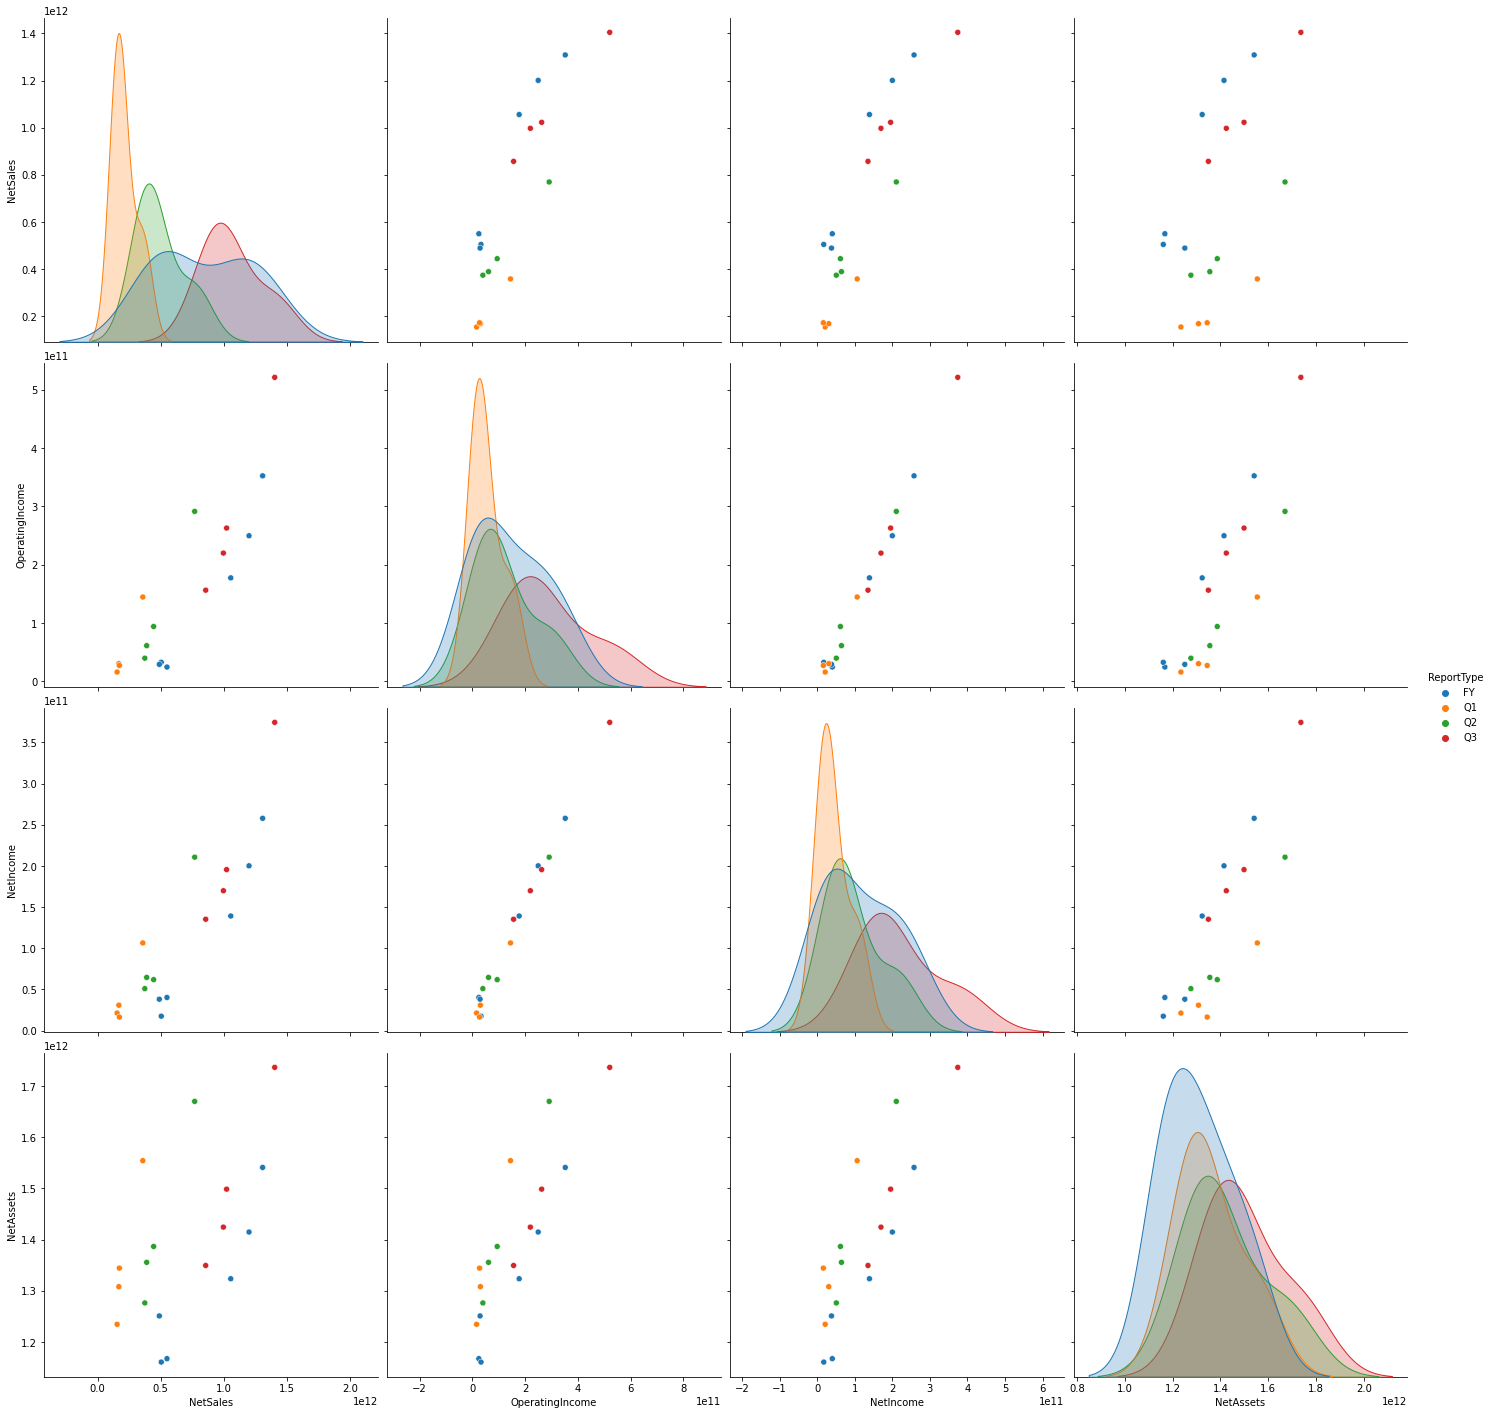

In [7]:
# plot
sns.pairplot(fin_data[plot_columns], hue="ReportType", height=5)

### 2.5.2 stock_price

No handles with labels found to put in legend.


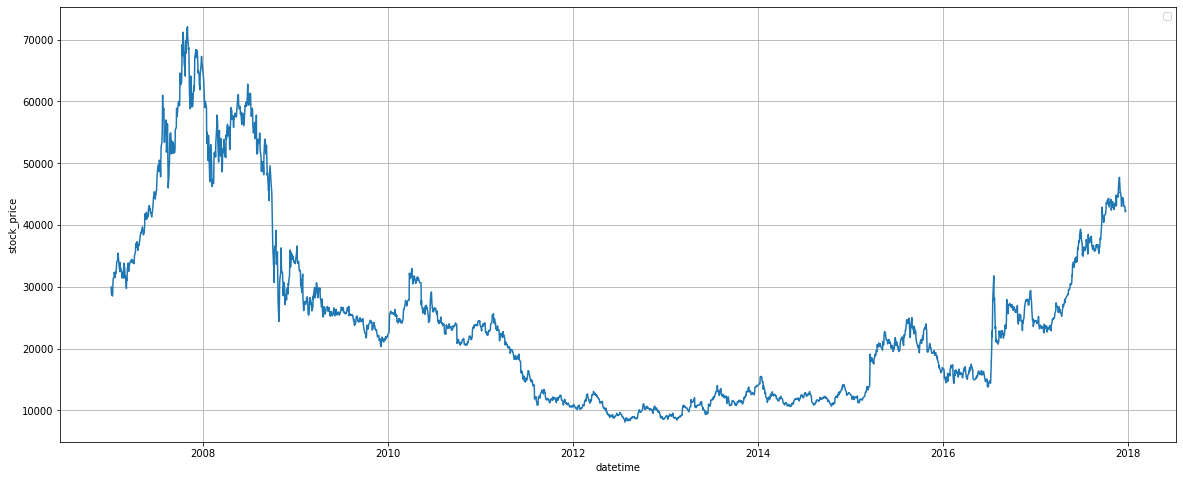

In [10]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

fig, ax = plt.subplots(figsize=(20, 8))

ax.plot(price_data["Close"])
ax.set_ylabel("stock_price")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.3 Moving Average

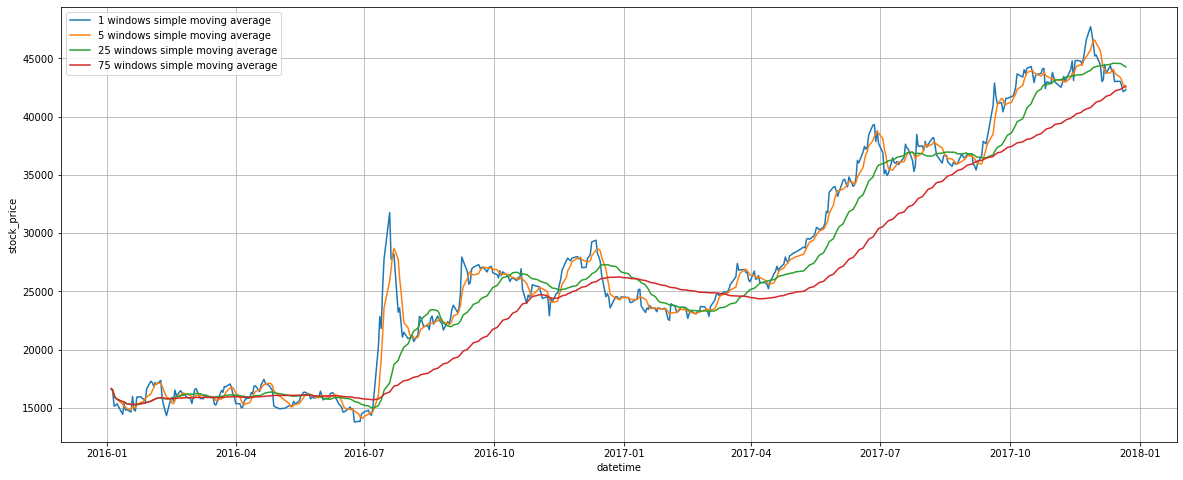

In [11]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate MA for 1 day as original, 5days, 25days, 75days
periods = [1, 5, 25, 75]
cols = []
for period in periods:
    col = "{} windows simple moving average".format(period)
    price_data[col] = price_data["Close"].rolling(period, min_periods=1).mean()
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("stock_price")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.4 価格変化率

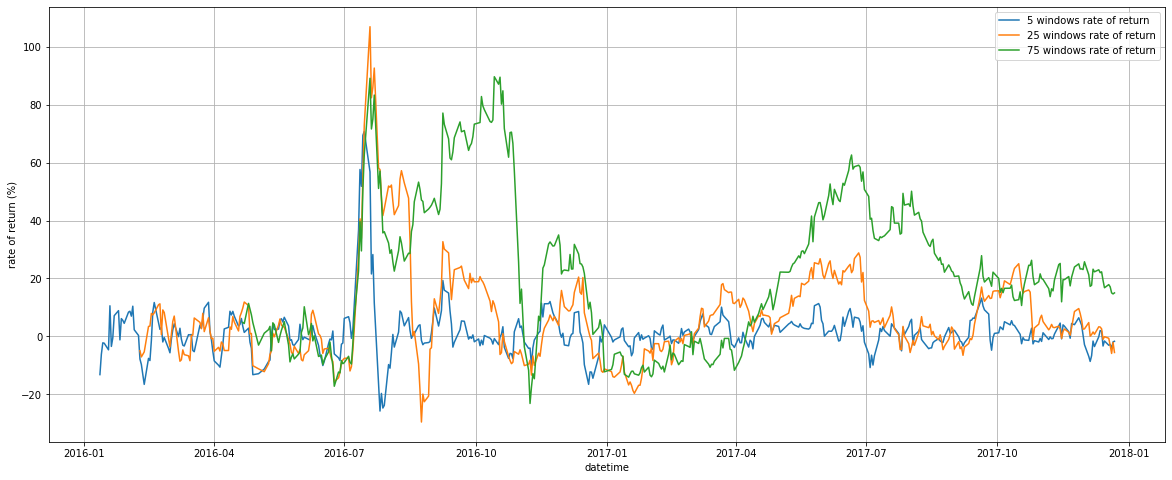

In [12]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate price changing ratio for 5days, 25days, 75days
periods = [5, 25, 75]
cols = []
for period in periods:
    col = "{} windows rate of return".format(period)
    price_data[col] = price_data["Close"].pct_change(period) * 100
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("rate of return (%)")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.5. Historical Volatility

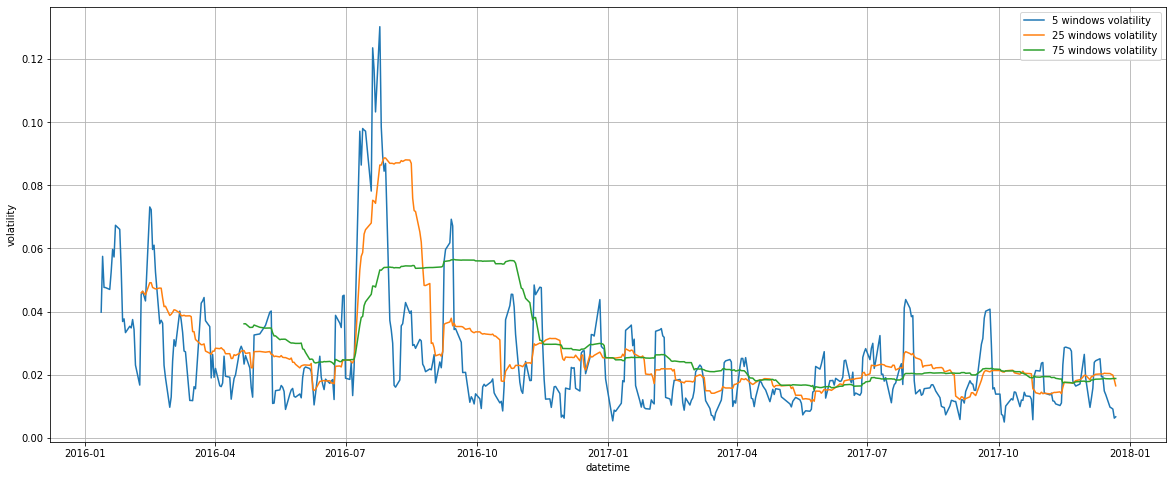

In [13]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate HV for 5days, 25days, 75days
periods = [5, 25, 75]
cols = []
for period in periods:
    col = "{} windows volatility".format(period)
    price_data[col] = np.log(price_data["Close"]).diff().rolling(period).std()
    cols.append(col)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in cols:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("volatility")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.5.6 plot altogether

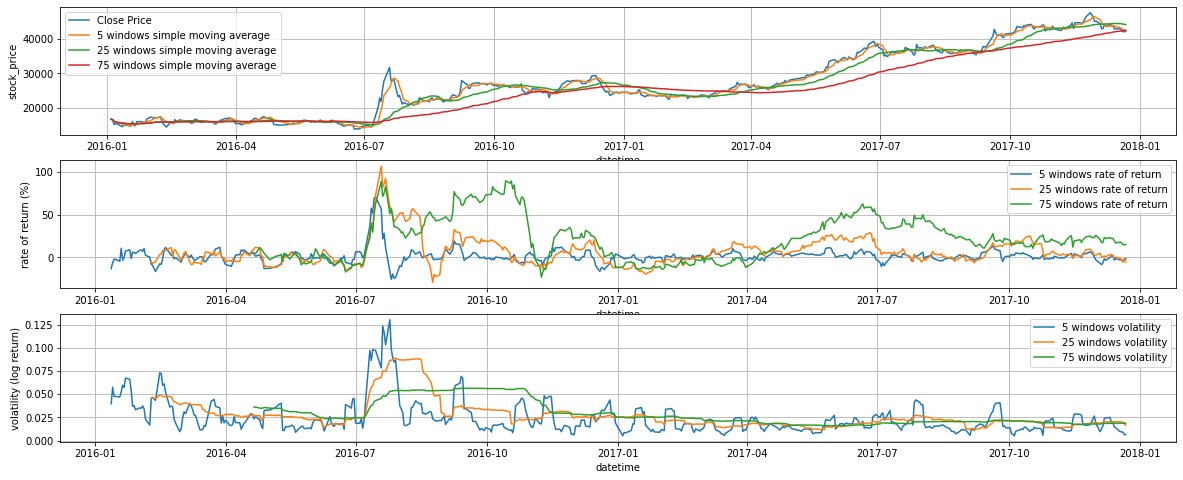

In [14]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# calculate indices for 5days, 25days, 75days
periods = [5, 25, 75]
ma_cols = []
# MA
for period in periods:
    col = "{} windows simple moving average".format(period)
    price_data[col] = price_data["Close"].rolling(period, min_periods=1).mean()
    ma_cols.append(col)

return_cols = []
# price changing ratio
for period in periods:
    col = "{} windows rate of return".format(period)
    price_data[col] = price_data["Close"].pct_change(period) * 100
    return_cols.append(col)

vol_cols = []
# Historical Volatility
for period in periods:
    col = "{} windows volatility".format(period)
    price_data[col] = np.log(price_data["Close"]).diff().rolling(period).std()
    vol_cols.append(col)

# plot
fig, ax = plt.subplots(nrows=3 ,figsize=(20, 8))

ax[0].plot(price_data["Close"], label="Close Price")

for col in ma_cols:
    ax[0].plot(price_data[col], label=col)

for col in return_cols:
    ax[1].plot(price_data[col], label=col)

for col in vol_cols:
    ax[2].plot(price_data[col], label=col)

ax[0].set_ylabel("stock_price")
ax[1].set_ylabel("rate of return (%)")
ax[2].set_ylabel("volatility (log return)")
for _ax in ax:
    _ax.set_xlabel("datetime")
    _ax.grid(True)
    _ax.legend()

### 2.6.x additional index : MACD

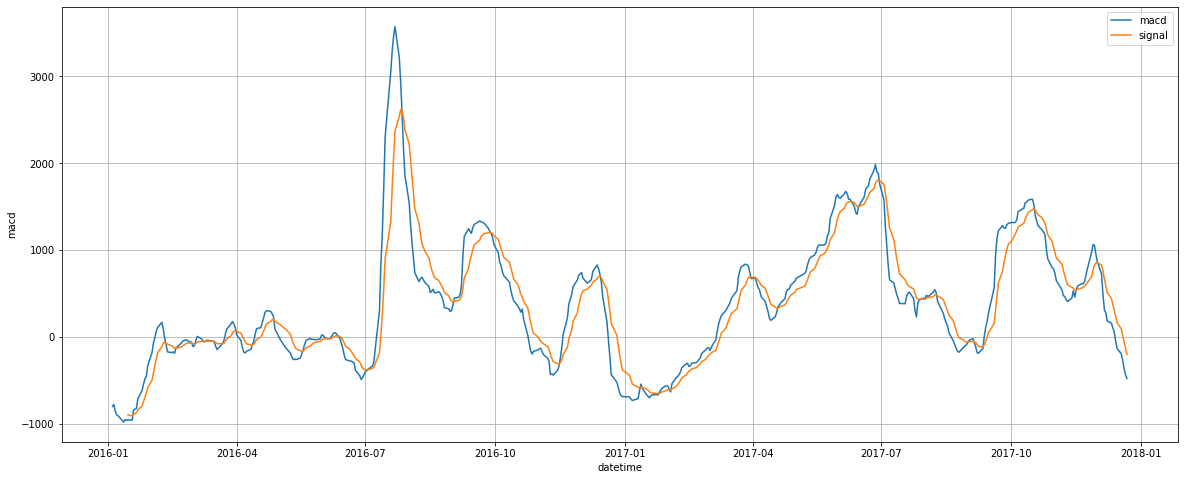

In [15]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2015":"2019"].copy()

# define SMA, EMA
def sma(src, period):
    
    return src.rolling(period, min_periods=1).mean()

def ema(src, period):
    ema = np.zeros(len(src))
    ema[:] = np.nan # NaN initialize
    ema[period-1] = src[:period].mean() # SMA for the first periods
    
    for day in range(period, len(src)):
        ema[day] = ema[day-1] + (src[day] - ema[day-1]) / (period + 1) * 2
    
    return ema

# calculate EMA for 12days, 26days
periods = [12, 26]
signal_smoothing = 9
cols = []
for period in periods:
    col = "{} windows exponential moving average".format(period)
    price_data[col] = ema(price_data["Close"], period).round(1)
    cols.append(col)

price_data = price_data["2016":"2019"].copy()
price_data["macd"] = price_data[cols[0]] - price_data[cols[1]]
price_data["signal"] = ema(price_data["macd"], signal_smoothing).round(1)

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in ["macd", "signal"]:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("macd")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.6.y additional index : STOCH

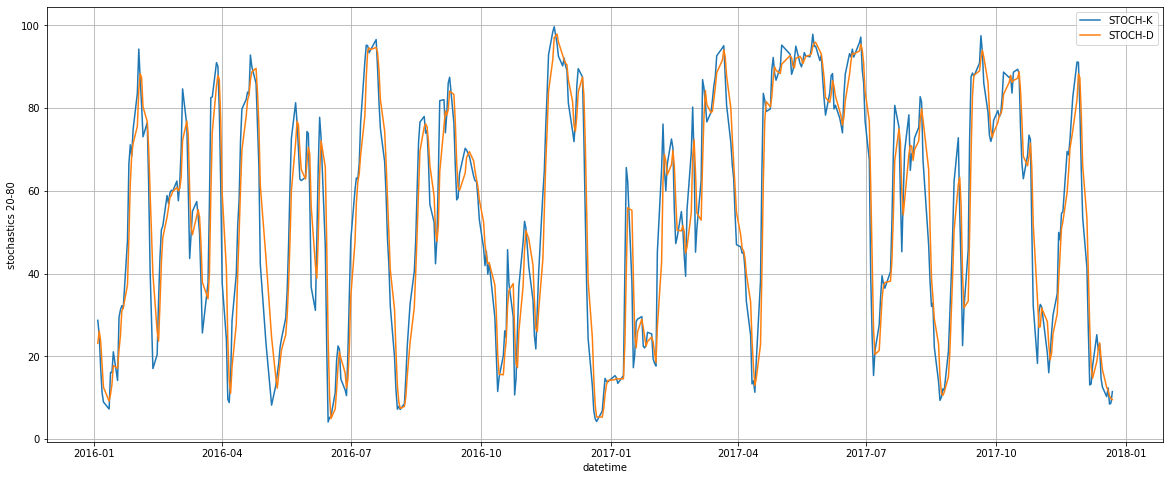

In [16]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2015":"2019"].copy()

# define SMA, EMA
def sma(src, period):
    
    return src.rolling(period, min_periods=1).mean()

def ema(src, period):
    ema = np.zeros(len(src))
    ema[:] = np.nan # NaN initialize
    ema[period-1] = src[:period].mean() # SMA for the first periods
    
    for day in range(period, len(src)):
        ema[day] = ema[day-1] + (src[day] - ema[day-1]) / (period + 1) * 2
    
    return ema

def stok(src, length): 
    stok = ((src["Close"] - src["Low"].rolling(length).min()) / (src["High"].rolling(length).max() - src["Low"].rolling(length).min())) * 100
    
    return stok

# calculate stochastics
length = 14
period = 3
cols = []

price_data["STOCH-K"] = sma(stok(price_data, length), period)
price_data["STOCH-D"] = sma(price_data["STOCH-K"], period)
price_data = price_data["2016":"2019"].copy()

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in ["STOCH-K", "STOCH-D"]:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("stochastics 20-80")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

### 2.6.z additional index : RSI

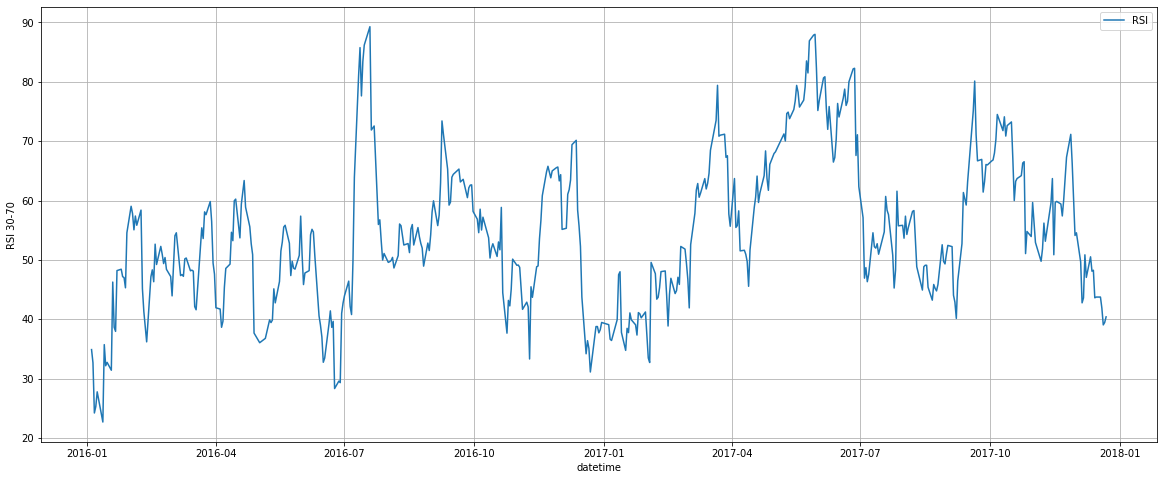

In [17]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2015":"2019"].copy()

# define SMA, EMA, RMA, STOCH, RSI
def sma(src, period):
    
    return src.rolling(period, min_periods=1).mean()

def ema(src, period):
    ema = np.zeros(len(src))
    ema[:] = np.nan # NaN initialize
    ema[period-1] = src[:period].mean() # SMA for the first periods
    
    for day in range(period, len(src)):
        ema[day] = ema[day-1] + (src[day] - ema[day-1]) / (period + 1) * 2
    
    return ema

def rma(src, period):
    rma = np.zeros(len(src))
    rma[:] = np.nan # NaN initialize
    rma[period-1] = src[:period].mean() # SMA for the first periods
    
    for day in range(period, len(src)):
        rma[day] = rma[day-1] + (src[day] - rma[day-1]) / period
    
    return rma

def stok(src, length): 
    stok = ((src["Close"] - src["Low"].rolling(length).min()) / (src["High"].rolling(length).max() - src["Low"].rolling(length).min())) * 100
    
    return stok

def RSI(src, length):
    up, down = src["Close"].diff().apply(lambda x: max(x,0)), src["Close"].diff().apply(lambda x: min(x, 0))
    RS = rma(up, length) / rma(abs(down), length)
    RSI = 100.0 - (100.0 / (1.0 + RS))
    
    return RSI

# calculate RSI
length = 14
cols = []

price_data["RSI"] = RSI(price_data, length)
price_data = price_data["2016":"2019"].copy()

# plot
fig, ax = plt.subplots(figsize=(20, 8))

for col in ["RSI"]:
    ax.plot(price_data[col], label=col)
ax.set_ylabel("RSI 30-70")
ax.set_xlabel("datetime")
ax.grid(True)
ax.legend()

remaining to do: plot 3 index altogether 

## 2.7 Generate features

### 2.7.3 An example of generating features

In [18]:
price_data = dfs["stock_price"]

# narrow down to a single stock code
price_data = price_data[price_data['ticker']==7974]

# delimited 2016:2019
price_data = price_data["2016":"2019"].copy()

# Use the closure price
feats = price_data[["Close"]].copy()
# percent of change : 20 days
feats["return_1month"] = feats["Close"].pct_change(20)
# percent of change : 40 days
feats["return_2month"] = feats["Close"].pct_change(40)
# percent of change : 60 days
feats["return_3month"] = feats["Close"].pct_change(60)
# volatility of 20 days
feats["volatility_1month"] = (
    np.log(feats["Close"]).diff().rolling(20).std()
)
# volatility of 40 days
feats["volatility_2month"] = (
    np.log(feats["Close"]).diff().rolling(40).std()
)
# volatility of 60 days
feats["volatility_3month"] = (
    np.log(feats["Close"]).diff().rolling(60).std()
)
# Gap of MA20 and the closure
feats["MA_gap_1month"] = feats["Close"] / (
    feats["Close"].rolling(20).mean()
)
# Gap of MA40 and the closure
feats["MA_gap_2month"] = feats["Close"] / (
    feats["Close"].rolling(40).mean()
)
# Gap of MA60 and the closure
feats["MA_gap_3month"] = feats["Close"] / (
    feats["Close"].rolling(60).mean()
)
feats = feats.fillna(0)
feats = feats.drop(["Close"], axis=1)

### 2.8.2 holdout validation

In [19]:
TRAIN_END = "2017-12-31"
VAL_START = "2018-02-01"
VAL_END = "2018-12-01"
TEST_START = "2019-01-01"

## 2.9 modeling

### 2.9.1 generate features  
remaining todo: interpolation

In [26]:
def get_features_for_predict(dfs, code, start_dt="2016-01-01"):
    """
    Args:
        dfs (dict)  : dict of pd.DataFrame include stock_fin, stock_price
        code (int)  : A local code for a listed company
        start_dt (str): specify date range
    Returns:
        feature DataFrame (pd.DataFrame)
    """
    # fundamentals.
    stock_fin = dfs["stock_fin"]

    # narrow down to a single stock code
    fin_data = stock_fin[stock_fin["ticker"] == code]
    
    ### Fill Quandl API and JQuants API gap
    get_columns = ["NetSales",
           "OperatingIncome",
           "NonOperatingIncome",
           "OrdinaryIncome", # Pretax Income
           "IncomeTaxes",
           "NetAssets" # Total Equity
          ]
    fin_data = extract_fin(fin_data, get_columns)

    fin_data = fin_data[['label', 'value', 'type_of_current_period']] \
        .set_index('type_of_current_period', append=True) \
        .pivot_table(values='value', index=['datetime', 'type_of_current_period'], columns='label') \
        .reset_index('type_of_current_period') \
        .rename(columns={'type_of_current_period' : 'ReportType'})

    # Calculate NetIncome due to lack of data 
    fin_data['NetIncome'] = fin_data['OrdinaryIncome'] - fin_data['IncomeTaxes']

    # 特徴量の作成には過去60営業日のデータを使用しているため、
    # 予測対象日からバッファ含めて土日を除く過去90日遡った時点から特徴量を生成します
    n = 90
    # setting period for feature generation
    fin_data = fin_data.loc[pd.Timestamp(start_dt) - pd.offsets.BDay(n) :]
    # Only to use numerical data, in precise np.float64
    fin_data = fin_data.select_dtypes(include=["float64"])
    fin_feats = fin_data.fillna(0)
    
    
    price = dfs["stock_price"]
    # narrow down to a single stock code
    price_data = price[price["ticker"] == code]
    feats = price_data[["Close"]]
    # setting period for feature generation
    feats = feats.loc[pd.Timestamp(start_dt) - pd.offsets.BDay(n) :].copy()

    # Use the closure price
    feats = price_data[["Close"]].copy()

    # percent of change : 20 days
    feats["return_1month"] = feats["Close"].pct_change(20)
    # percent of change : 40 days
    feats["return_2month"] = feats["Close"].pct_change(40)
    # percent of change : 60 days
    feats["return_3month"] = feats["Close"].pct_change(60)
    # volatility of 20 days
    feats["volatility_1month"] = (
        np.log(feats["Close"]).diff().rolling(20).std()
    )
    # volatility of 40 days
    feats["volatility_2month"] = (
        np.log(feats["Close"]).diff().rolling(40).std()
    )
    # volatility of 60 days
    feats["volatility_3month"] = (
        np.log(feats["Close"]).diff().rolling(60).std()
    )
    # Gap of MA20 and the closure
    feats["MA_gap_1month"] = feats["Close"] / (
        feats["Close"].rolling(20).mean()
    )
    # Gap of MA40 and the closure
    feats["MA_gap_2month"] = feats["Close"] / (
        feats["Close"].rolling(40).mean()
    )
    # Gap of MA60 and the closure
    feats["MA_gap_3month"] = feats["Close"] / (
        feats["Close"].rolling(60).mean()
    )
    # fill NaN for the moment
    feats = feats.fillna(0)
    feats = feats.drop(["Close"], axis=1)

    # combine price data and fundamentals data
    feats = feats.loc[feats.index.isin(fin_feats.index)]
    fin_feats = fin_feats.loc[fin_feats.index.isin(feats.index)]

    # データを結合
    feats = pd.concat([feats, fin_feats], axis=1).dropna()

    # 欠損値処理を行います。
    feats = feats.replace([np.inf, -np.inf], 0)

    # set stock code
    feats["code"] = code

    # 生成対象日以降の特徴量に絞る
    feats = feats.loc[pd.Timestamp(start_dt) :]

    return feats

In [27]:
df = get_features_for_predict(dfs, 7974)
df.T

datetime,2016-03-31,2017-03-31,2017-06-30
return_1month,3.764115e-03,1.293989e-01,1.234347e-01
return_2month,-6.841339e-02,1.472025e-01,3.288662e-01
return_3month,-3.932753e-02,5.535131e-02,4.461716e-01
volatility_1month,2.868514e-02,1.727391e-02,2.125501e-02
volatility_2month,3.479288e-02,1.817290e-02,1.849703e-02
volatility_3month,3.871872e-02,1.866286e-02,1.702882e-02
MA_gap_1month,9.883559e-01,1.009475e+00,1.035364e+00
MA_gap_2month,9.910573e-01,1.055621e+00,1.115028e+00
MA_gap_3month,1.002150e+00,1.067202e+00,1.197857e+00
IncomeTaxes,1.119700e+10,1.214700e+10,9.568000e+09


### 2.9.2 set y_true and split train/val/test

Changed from tutorial code :  y_true (stock labels) to stock price(Close) for regression

In [28]:
def get_features_and_label(dfs, codes, feature, label="Close"):
    """
    Args:
        dfs (dict[pd.DataFrame]): loaded data
        codes  (array) : target codes
        feature (pd.DataFrame): features
        label (str) : label column name
    Returns:
        train_X (pd.DataFrame): training data
        train_y (pd.DataFrame): label for train_X
        val_X (pd.DataFrame): validation data
        val_y (pd.DataFrame): label for val_X
        test_X (pd.DataFrame): test data
        test_y (pd.DataFrame): label for test_X
    """
    # define variables for data splitting
    trains_X, vals_X, tests_X = [], [], []
    trains_y, vals_y, tests_y = [], [], []

    # generate features per stock code
    for code in codes: #tqdm(codes):
        # generate features
        feats = feature[feature["code"] == code]

        # y_true from stock_price instead of stock_label
        stock_labels = dfs["stock_price"]
        # narrow down to a single stock code
        stock_labels = stock_labels[stock_labels["ticker"] == code]

        # closing price as y_true
        labels = stock_labels[label]
        # nanを削除
        labels.dropna(inplace=True)

        if feats.shape[0] > 0 and labels.shape[0] > 0:
            # 特徴量と目的変数のインデックスを合わせる
            labels = labels.loc[labels.index.isin(feats.index)]
            feats = feats.loc[feats.index.isin(labels.index)]
            labels.index = feats.index

            # データを分割（ホールドアウト法）
            _train_X = feats[: TRAIN_END]
            _val_X = feats[VAL_START : VAL_END]
            _test_X = feats[TEST_START :]

            _train_y = labels[: TRAIN_END]
            _val_y = labels[VAL_START : VAL_END]
            _test_y = labels[TEST_START :]

            # データを配列に格納 (後ほど結合するため)
            trains_X.append(_train_X)
            vals_X.append(_val_X)
            tests_X.append(_test_X)

            trains_y.append(_train_y)
            vals_y.append(_val_y)
            tests_y.append(_test_y)

    # 銘柄毎に作成した説明変数データを結合します。
    train_X = pd.concat(trains_X)
    val_X = pd.concat(vals_X)
    test_X = pd.concat(tests_X)
    # 銘柄毎に作成した目的変数データを結合します。
    train_y = pd.concat(trains_y)
    val_y = pd.concat(vals_y)
    test_y = pd.concat(tests_y)

    return train_X, train_y, val_X, val_y, test_X, test_y

In [29]:
# 対象銘柄コードを定義
codes = [7974]
# 対象の目的変数を定義
label = "Close"
# 特徴量を取得
feat = get_features_for_predict(dfs, codes[0])
# 特徴量と目的変数を入力し、分割データを取得
ret = get_features_and_label(dfs, codes, feat, label)
for v in ret:
    print(v.T)

datetime              2016-03-31    2017-03-31    2017-06-30
return_1month       3.764115e-03  1.293989e-01  1.234347e-01
return_2month      -6.841339e-02  1.472025e-01  3.288662e-01
return_3month      -3.932753e-02  5.535131e-02  4.461716e-01
volatility_1month   2.868514e-02  1.727391e-02  2.125501e-02
volatility_2month   3.479288e-02  1.817290e-02  1.849703e-02
volatility_3month   3.871872e-02  1.866286e-02  1.702882e-02
MA_gap_1month       9.883559e-01  1.009475e+00  1.035364e+00
MA_gap_2month       9.910573e-01  1.055621e+00  1.115028e+00
MA_gap_3month       1.002150e+00  1.067202e+00  1.197857e+00
IncomeTaxes         1.119700e+10  1.214700e+10  9.568000e+09
NetAssets           1.160901e+12  1.250972e+12  1.234658e+12
NetSales            5.044590e+11  4.890950e+11  1.540690e+11
NonOperatingIncome  1.455000e+10  2.859300e+10  1.510500e+10
OperatingIncome     3.288100e+10  2.936200e+10  1.620800e+10
OrdinaryIncome      2.879000e+10  5.036400e+10  3.096000e+10
NetIncome           1.75

/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/series.py:5257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [ ]:
def get_codes(dfs):
    """
    Args:
        dfs (dict[pd.DataFrame]): loaded data
    Returns:
        array: list of stock codes
    """
    stock_list = dfs["stock_list"].copy()
    # 予測対象の銘柄コードを取得
    codes = stock_list[stock_list["prediction_target"] == True][
        "Local Code"
    ].values
    return codes

In [ ]:
# 対象の目的変数を定義
labels = {
    "Close",
#     "label_high_5",
#     "label_high_10",
#     "label_high_20",
#     "label_low_5",
#     "label_low_10",
#     "label_low_20",
}
# 目的変数毎にデータを保存するための変数
train_X, val_X, test_X = {}, {}, {}
train_y, val_y, test_y = {}, {}, {}

# 予測対象銘柄を取得
codes = get_codes(dfs)

# 特徴量を作成
buff = []
for code in tqdm(codes):
    feat = get_features_for_predict(dfs, code)
    buff.append(feat)
feature = pd.concat(buff)

# 目的変数毎に処理
for label in tqdm(labels):
    # 特徴量と目的変数を取得
    _train_X, _train_y, _val_X, _val_y, _test_X, _test_y = get_features_and_label(dfs, codes, feature, label)
    # 目的変数をキーとして値を保存
    train_X[label] = _train_X
    val_X[label] = _val_X
    test_X[label] = _test_X
    train_y[label] = _train_y
    val_y[label] = _val_y
    test_y[label] = _test_y